In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np # numpy는 배열 사용할 때
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [52]:
X = np.random.randint(25, 50, (25, 2))
Y = np.random.randint(60, 85, (25, 2))

Z = np.vstack((X, Y))
Z = np.float32(Z)
print(Z)

[[47. 39.]
 [40. 36.]
 [32. 28.]
 [32. 40.]
 [41. 42.]
 [27. 32.]
 [33. 25.]
 [40. 47.]
 [29. 31.]
 [43. 31.]
 [38. 39.]
 [40. 30.]
 [34. 30.]
 [41. 47.]
 [31. 33.]
 [47. 46.]
 [41. 42.]
 [30. 37.]
 [38. 44.]
 [36. 43.]
 [49. 40.]
 [43. 30.]
 [31. 44.]
 [28. 43.]
 [38. 32.]
 [81. 71.]
 [61. 84.]
 [60. 77.]
 [73. 64.]
 [76. 84.]
 [77. 78.]
 [83. 77.]
 [61. 77.]
 [69. 68.]
 [72. 66.]
 [73. 66.]
 [64. 71.]
 [71. 70.]
 [81. 71.]
 [68. 83.]
 [62. 76.]
 [71. 73.]
 [82. 81.]
 [76. 84.]
 [70. 71.]
 [73. 70.]
 [66. 75.]
 [76. 78.]
 [65. 64.]
 [70. 71.]]


In [53]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [54]:
A = Z[label.ravel() == 0]
B = Z[label.ravel() == 1]

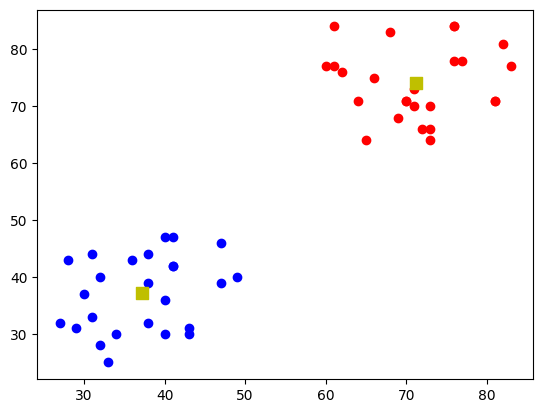

In [55]:
plt.scatter(A[:, 0], A[:, 1], c = 'b')
plt.scatter(B[:, 0], B[:, 1], c = 'r')
plt.scatter(center[:, 0], center[:, 1], s = 80, c = 'y', marker = 's')

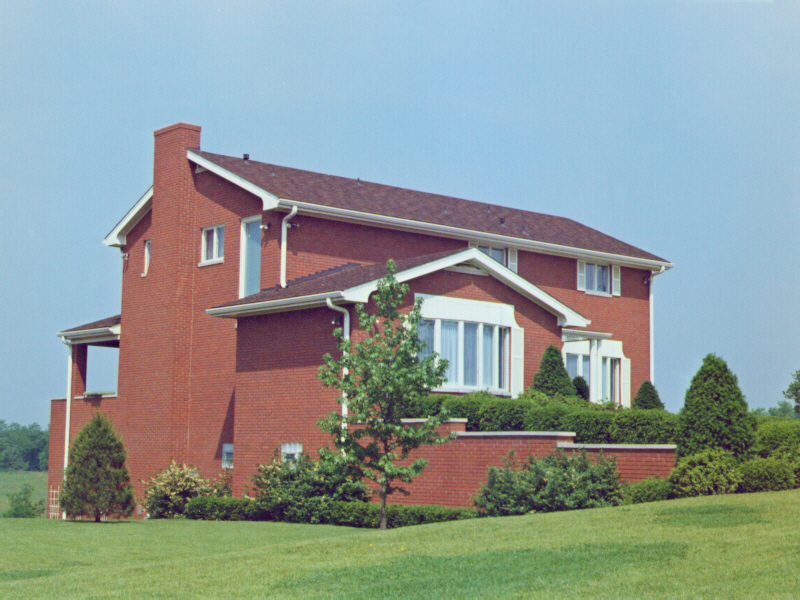

In [28]:
img = cv2.imread('/content/gdrive/My Drive/ImageProcessing/Ch01/IP/Images/home3.jpg')
cv2_imshow(img)

In [14]:
Z = img.reshape((-1, 3))
Z = np.float32(Z)
print(Z.shape)

(480000, 3)


In [48]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
# ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

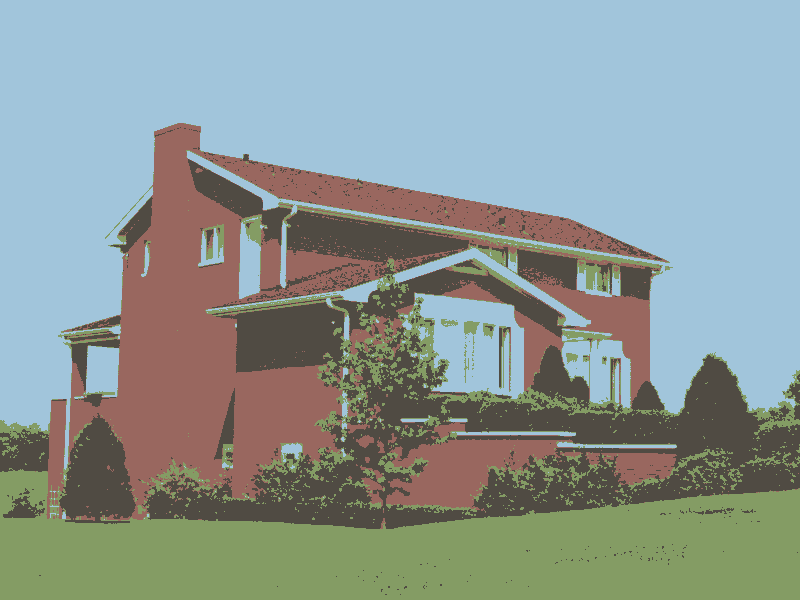

In [24]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)

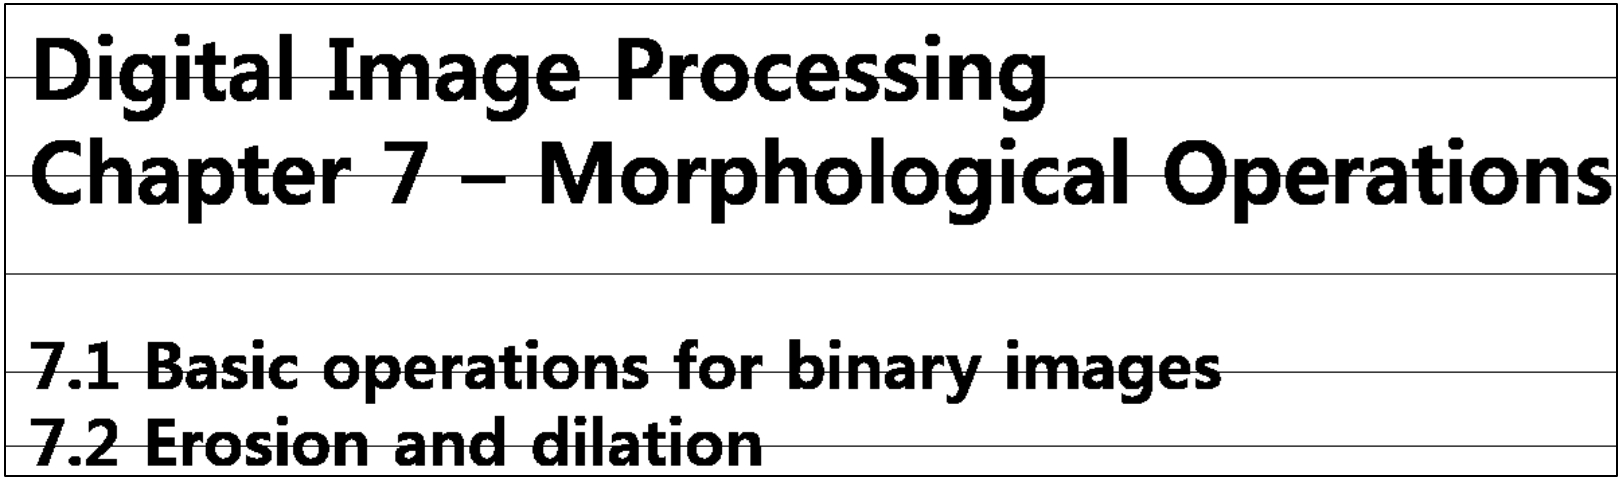

In [31]:
img = cv2.imread('/content/gdrive/My Drive/ImageProcessing/Ch01/IP/Images/scanimg.jpg')
cv2_imshow(gImg1)

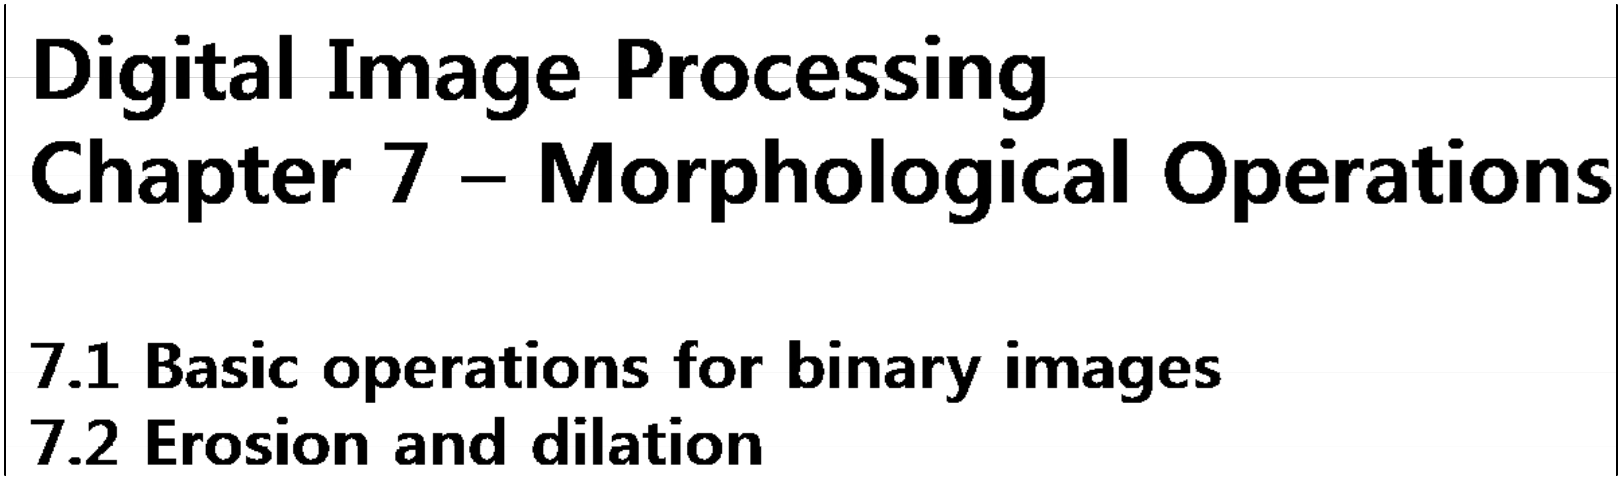

In [39]:
kernel = np.ones((3, 1), np.uint8)
dilate = cv2.dilate(gImg1, kernel, iterations = 1)
cv2_imshow(dilate)

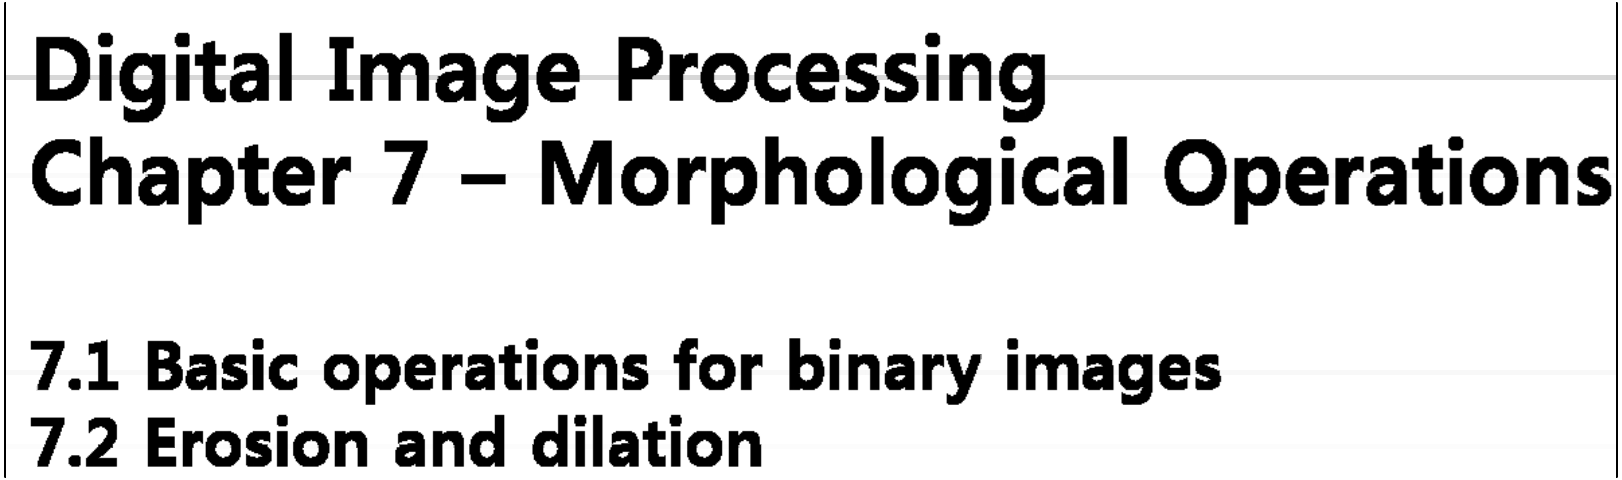

In [41]:
kernel = np.ones((3, 1), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations = 2)
cv2_imshow(erosion)

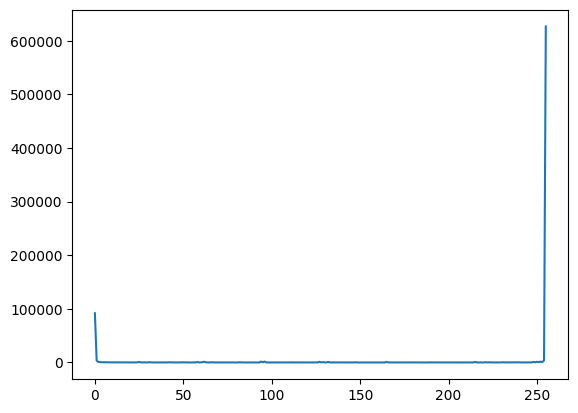

In [43]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 256])
plt.plot(hist)

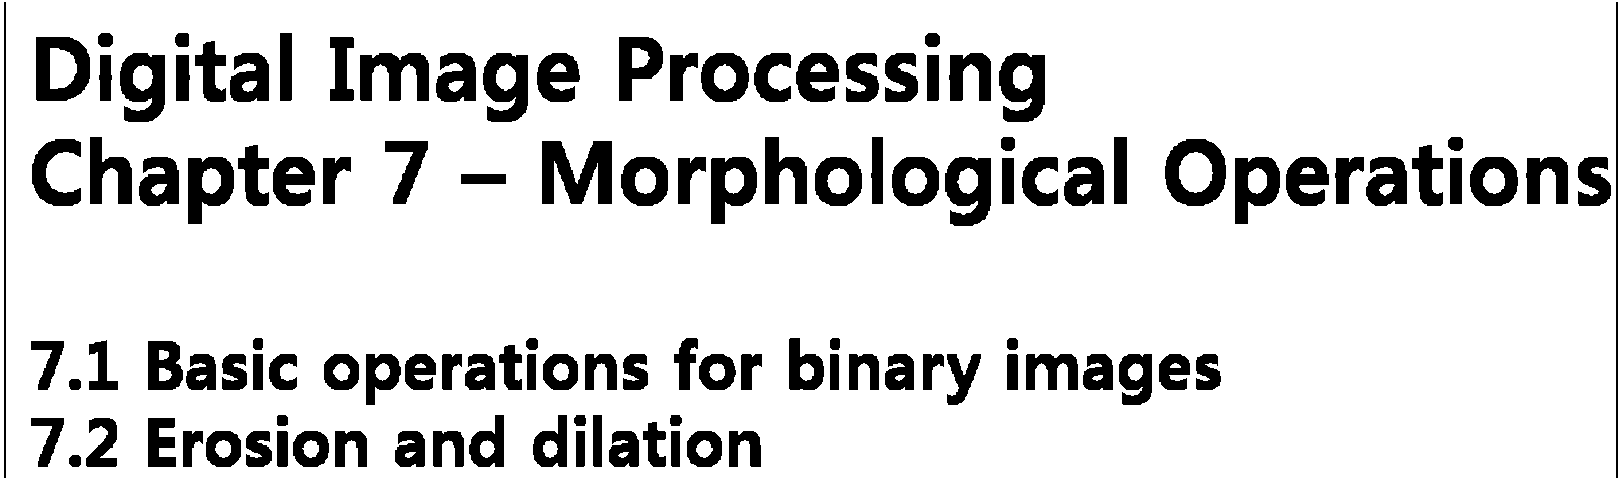

In [49]:
gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype = np.uint8)

threshold = 110

for i in range (gImg1.shape[0]):
  for j in range (gImg1.shape[1]):
    if erosion[i, j] > threshold:
      gBin[i, j] = 255

cv2_imshow(gBin)

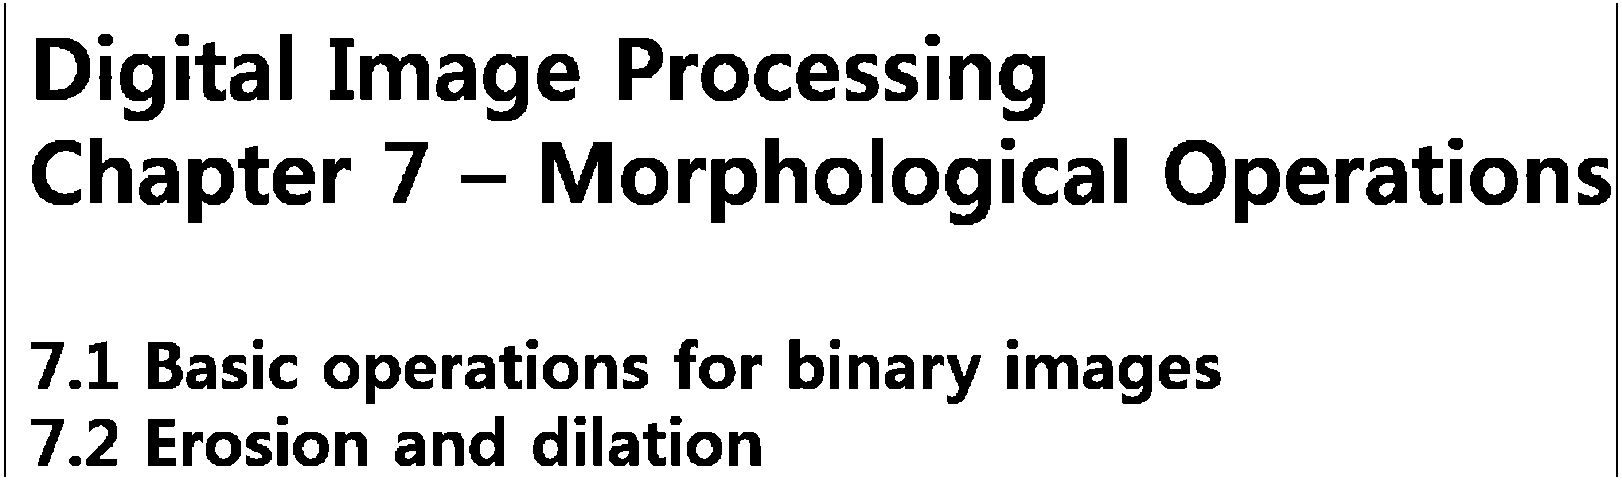

In [46]:
kernel = np.ones((3, 1), np.uint8)
dilate = cv2.dilate(gBin, kernel, iterations = 1)
cv2_imshow(dilate)

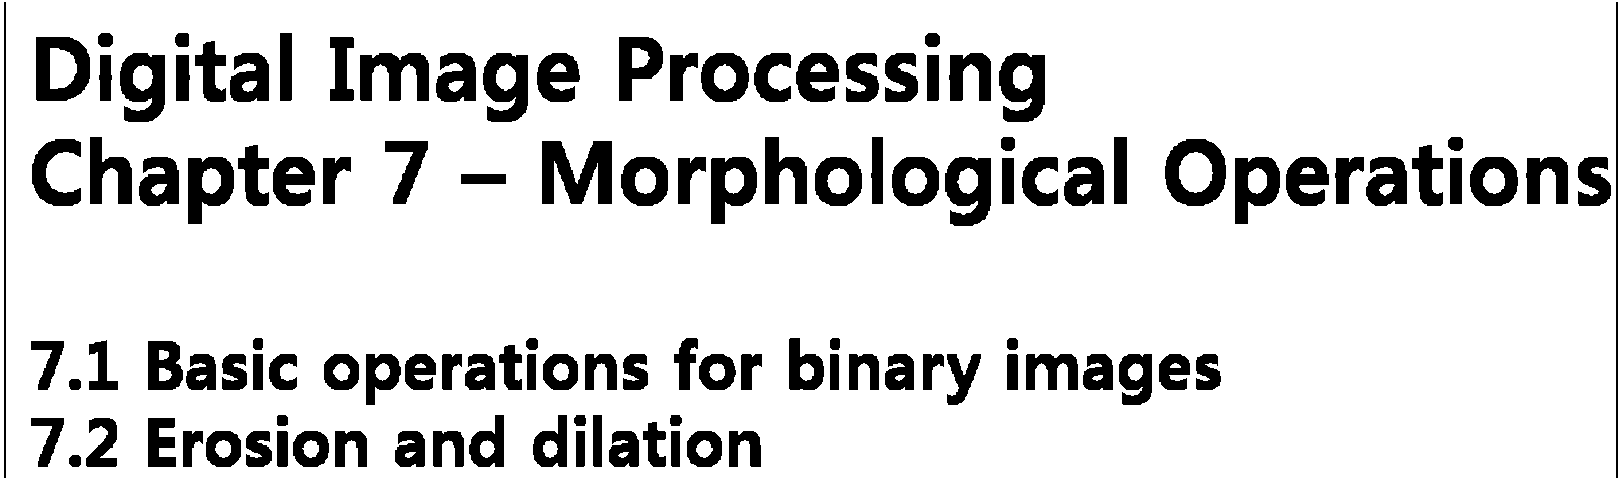

In [47]:
kernel = np.ones((3, 1), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations = 1)
cv2_imshow(erosion)